<a href="https://colab.research.google.com/github/Benbuk/GOMYCODE_DS_Bootcamp/blob/main/Data_Visualization_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Visualization with Python_Plotly

Checkpoint Objective

In this checkpoint, we are going to work on the 'Climate change in Africa' dataset that was provided by the U.S global change research program.

Dataset description : This dataset contains historical data about the daily min, max and average temperature fluctuation in 5 African countries (Egypt, Tunisia, Cameroon, Senegal, Angola) between 1980 and 2023.

[Datalink](https://drive.google.com/file/d/1I8eV4-8p61CNNlVJzzho2xeoZ5-P7Q0F/view)

Instructions
1. Load the dataset into a data frame using Python.
2. Clean the data as needed.
3. Plot a line chart to show the average temperature fluctuations in Tunisia and Cameroon. 4. Interpret the results.
5. Zoom in to only include data between 1980 and 2005, try to customize the axes labels.
6. Create Histograms to show temperature distribution in Senegal between [1980,2000] and [2000,2023] (in the same figure). Describe the obtained results.
7. Select the best chart to show the Average temperature per country.
Make your own questions about the dataset and try to answer them using the appropriate visuals.






**1.0 All the libraries needed is installed**

In [1]:
#importing and installing all the neccessary libraries
!pip install pandas-profiling #install Ydata Profiling
import pandas as pd
import numpy as np
import ydata_profiling as ydp # Import the Ydata_profiling library that have been installed
import profile # Imports profile for creating html or notebook from ydata_profiling results
from ydata_profiling import ProfileReport
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=80acf3f5432f74cd1c9d6d5cae2c07661c27fc2b20ea919b2fed17cee77d841d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01

**2.0 Understanding the Dataset**

The African Climate Change dataset has been imported, and an initial overview is obtained using the info() method. In summary, the dataset comprises 464,815 observations across a total of 6 columns. A closer examination using the head() function reveals the presence of missing values in the dataset.

This preliminary exploration sets the stage for further analysis and data processing to handle the missing values and gain deeper insights into the climate data.

In [74]:
#importing dataset
Africa_climate_change = pd.read_csv("/content/Africa_climate_change.csv")
#basic information about the dataset
Africa_climate_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464815 entries, 0 to 464814
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   DATE     464815 non-null  object 
 1   PRCP     177575 non-null  float64
 2   TAVG     458439 non-null  float64
 3   TMAX     363901 non-null  float64
 4   TMIN     332757 non-null  float64
 5   COUNTRY  464815 non-null  object 
dtypes: float64(4), object(2)
memory usage: 21.3+ MB


In [35]:
Africa_climate_change.head()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,19800101 000000,NaN,54.0,61.0,43.0,Tunisia
1,19800101 000000,NaN,49.0,55.0,41.0,Tunisia
2,19800101 000000,0.0,72.0,86.0,59.0,Cameroon
3,19800101 000000,NaN,50.0,55.0,43.0,Tunisia
4,19800101 000000,NaN,75.0,91.0,NaN,Cameroon


In [36]:
Africa_climate_change.isnull().sum()

DATE            0
PRCP       287240
TAVG         6376
TMAX       100914
TMIN       132058
COUNTRY         0
dtype: int64

In [45]:
#Creates a Ydata profile
African_Climate_Change_DataProfile = ProfileReport(Africa_climate_change, title = " African Climate Change Data", minimal = True)
#Generates the profile
African_Climate_Change_DataProfile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**3.0 Data Cleaning/processing**


---
Upon conducting a thorough data profiling analysis, it was identified that four out of the six columns in the dataset contained null values. To address this, the `fillna()` method was employed, using the mean values of the 'TMIN' and 'TMAX' columns to replace missing values in those respective columns. Furthermore, for the 'TAVG' column, the remaining missing values were filled using the average of the 'TMIN' and 'TMAX' columns.

In the case of the 'PRCP' (Precipitation) column, a pragmatic assumption was made, treating null values as indicating zero precipitation. Subsequently, missing values were replaced with zeros. However, a noteworthy insight emerged from the data profiling results – the 'PRCP' column predominantly consists of 90.4% zeros. This suggests that there is a considerable number of days with no observed precipitation in the dataset, particularly for countries in Sub-Saharan Africa, such as Egypt, Tunisia, Senegal, Cameroon, and Angola. Given the geographical context, one might anticipate a higher frequency of observed precipitation.

To enhance the analysis, the 'DATE' column was transformed using `dt.year` to extract the year only. Additionally, the 'TAVG' column, originally in Fahrenheit, was converted to Celsius for more standardized temperature representation.

These data preprocessing steps aim to improve the integrity and interpretability of the dataset, laying the groundwork for more accurate and insightful analyses.

---


In [75]:
#filling missing data
Africa_climate_change["TMIN"] = Africa_climate_change['TMIN'].fillna(Africa_climate_change["TMIN"].mean())
Africa_climate_change["TMAX"] = Africa_climate_change['TMAX'].fillna(Africa_climate_change["TMAX"].mean())
Africa_climate_change['PRCP'] = Africa_climate_change['PRCP'].fillna(0)
Africa_climate_change['TAVG'] = Africa_climate_change['TAVG'].fillna(Africa_climate_change[['TMIN', 'TMAX']].mean(axis=1))

#Fixing the datetime column
Africa_climate_change['DATE'] = pd.to_datetime(Africa_climate_change['DATE'])
Africa_climate_change['YEAR'] = Africa_climate_change['DATE'].dt.year
Africa_climate_change['MONTH'] = Africa_climate_change['DATE'].dt.month_name()
Africa_climate_change


,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY,YEAR,MONTH
0,1980-01-01,0.0,54.0,61.000000,43.000000,Tunisia,1980,January
1,1980-01-01,0.0,49.0,55.000000,41.000000,Tunisia,1980,January
2,1980-01-01,0.0,72.0,86.000000,59.000000,Cameroon,1980,January
3,1980-01-01,0.0,50.0,55.000000,43.000000,Tunisia,1980,January
4,1980-01-01,0.0,75.0,91.000000,65.548262,Cameroon,1980,January
...,...,...,...,...,...,...,...,...
464810,2023-08-23,0.0,85.0,89.000000,65.548262,Senegal,2023,August
464811,2023-08-23,0.0,80.0,90.000000,72.000000,Egypt,2023,August
464812,2023-08-23,0.0,87.0,88.713969,73.000000,Egypt,2023,August
464813,2023-08-23,0.0,82.0,94.000000,65.548262,Senegal,2023,August


In [55]:
#Creates a Ydata profile
African_Climate_Change_DataProfile = ProfileReport(df_clean, title = " African Climate Change Data", minimal = True)
#Generates the profile
African_Climate_Change_DataProfile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [43]:
Africa_climate_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464815 entries, 0 to 464814
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   DATE     464815 non-null  datetime64[ns]
 1   PRCP     464815 non-null  float64       
 2   TAVG     464815 non-null  float64       
 3   TMAX     464815 non-null  float64       
 4   TMIN     464815 non-null  float64       
 5   COUNTRY  464815 non-null  object        
 6   YEAR     464815 non-null  int64         
 7   MONTH    464815 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 28.4+ MB


<Axes: >

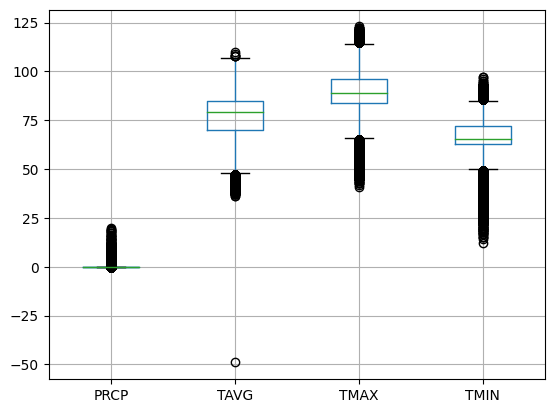

In [61]:
#Identifying outliers
Africa_climate_change.boxplot(['PRCP', 'TAVG', 'TMAX', 'TMIN'])

In [76]:
#Uisng Interquatile to exlcude outliers from the dataset
Africa_climate_change = Africa_climate_change[['TAVG', 'TMAX', 'TMIN', 'YEAR', 'MONTH', 'COUNTRY']]

# Find the Q1, Q3, and IQR for each column
Q1 = Africa_climate_change.quantile(0.25)
Q3 = Africa_climate_change.quantile(0.75)
IQR = Q3 - Q1

# Remove the outliers from the dataframe
Africa_climate_change_outliers = Africa_climate_change[~((Africa_climate_change < (Q1 - 1.5 * IQR)) | (Africa_climate_change > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print the shape of the original and cleaned dataframe
print("Original dataframe shape:", Africa_climate_change.shape)
print("Cleaned dataframe shape:", Africa_climate_change_outliers.shape)

<ipython-input-76-1b42ecba79b6>:4: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-76-1b42ecba79b6>:5: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-76-1b42ecba79b6>:9: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



Original dataframe shape: (464815, 6)
Cleaned dataframe shape: (410692, 6)


In [97]:
#Dataset without outliers
Africa_climate_change_outliers.head()

,TAVG,TMAX,TMIN,YEAR,MONTH,COUNTRY
2,72.0,86.0,59.000000,1980,January,Cameroon
4,75.0,91.0,65.548262,1980,January,Cameroon
6,76.0,97.0,59.000000,1980,January,Senegal
7,74.0,95.0,59.000000,1980,January,Senegal
8,78.0,93.0,63.000000,1980,January,Senegal


In [92]:
#grouping the data set to make easier to understand
group_by_year = Africa_climate_change_outliers.groupby(['YEAR', 'COUNTRY']).mean()['TAVG']
print(group_by_year)



YEAR  COUNTRY 
1980  Angola      77.130049
      Cameroon    78.454225
      Egypt       75.612571
      Senegal     82.168826
      Tunisia     72.438692
                    ...    
2023  Angola      72.968992
      Cameroon    82.738178
      Egypt       79.021816
      Senegal     84.405147
      Tunisia     73.613048
Name: TAVG, Length: 207, dtype: float64


<ipython-input-92-b02e9d49c95c>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [93]:
#Resetting the index of the dataframe
grouped_Dataframe = group_by_year.reset_index()

#converting the average temperature column from Fahrenheit to Celsius
def fahrenheit_to_celsius(temp):
    return (temp - 32) * 5/9

grouped_Dataframe['TAVG'] = grouped_Dataframe['TAVG'].apply(fahrenheit_to_celsius)

grouped_Dataframe

,YEAR,COUNTRY,TAVG
0,1980,Angola,25.072250
1,1980,Cameroon,25.807903
2,1980,Egypt,24.229206
3,1980,Senegal,27.871570
4,1980,Tunisia,22.465940
...,...,...,...
202,2023,Angola,22.760551
203,2023,Cameroon,28.187876
204,2023,Egypt,26.123231
205,2023,Senegal,29.113971


**4.0 Data Analysis, Visualiztion and Results**

*4.1 Tunisia and Cameroon*

The dataset has been filtered by subsetting to extract only the annual average temperatures ('AVG temperature') for Tunisia and Cameroon. The line graphs generated from this subset reveal a gradual increase in the annual average temperature for both countries over the period from 1980 to 2023. Notably, there has been an approximate 2-degree Celsius rise in temperature over the past four decades in both Tunisia and Cameroon. This observed trend is indicative of the broader impact of global warming and climate change.

Furthermore, when comparing the annual average temperatures of the two countries, Tunisia consistently exhibits a lower yearly average temperature, hovering just below 22 degrees Celsius. This temperature difference can be attributed, in part, to the Mediterranean climate of Tunisia, which tends to be cooler compared to Cameroon, located in the Sub-Saharan African region. Cameroon, with its geographical location, experiences a warmer climate with an average temperature of around 28 degrees Celsius.

These findings contribute to our understanding of the local climate dynamics in Tunisia and Cameroon, emphasizing the significance of tracking temperature trends in the context of global environmental changes.

In [94]:
Tunisia_Cameroon_1980_2023 = grouped_Dataframe[grouped_Dataframe['COUNTRY'].isin(['Tunisia', 'Cameroon'])]
Tunisia_Cameroon_1980_2023 = Tunisia_Cameroon_1980_2023.sort_values('YEAR')
Tunisia_Cameroon_1980_2023
#Average Temperature flunctuation in Tunisia and Cameroon
fig = px.line(Tunisia_Cameroon_1980_2023,
              x='YEAR',
              y='TAVG',
              color='COUNTRY',
              title='Average Temperature Fluctuations in Tunisia and Cameroon 1980 to 2023',
              labels={'TAVG':'Average Temperature (°C)',
                      'YEAR':'Year'})

fig.show()

In [ ]:
#Zoom in to only include data between 1980 and 2005, try to customize the axes labels.
Tunisia_Cameroon_1980_2005 = grouped_Dataframe.query('YEAR >= 1980 & YEAR <= 2005 & (COUNTRY== "Tunisia" or COUNTRY == "Cameroon")')
#Average Temperature flunctuation in Tunisia and Cameroon 1980 to 2005
fig = px.line(Tunisia_Cameroon_1980_2005,
              x='YEAR',
              y='TAVG',
              color='COUNTRY',
              title='Average Temperature Fluctuations in Tunisia and Cameroon 1980 to 2005',
              labels={'TAVG':'Average Temperature (°C)',
                      'YEAR':'Year'})

fig.show()


*4.2 Temperature Distribution in Senegal *

The histogram illustrates;

>1980-2000 Temperature Distribution: During this period, Senegal had a higher frequency of average temperatures around 27.5°C to just below 28°C. The frequency decreased as the temperature increased beyond this point.

>2000-2023 Temperature Distribution: In this period, there was a noticeable increase in frequency at higher average temperatures. There was also a significant decrease in lower average temperatures compared to the earlier period.

This suggests a shift towards higher average temperatures in Senegal from 2000 to 2023 compared to the period from 1980 to 2000. This could be indicative of a warming trend in Senegal’s climate during this time.

In [95]:
# Filter data for Senegal
Senegal_data = grouped_Dataframe[grouped_Dataframe['COUNTRY'] == 'Senegal']

# Create two dataframes for the two time periods
data_1980_2000 = Senegal_data[(Senegal_data['YEAR'] >= 1980) & (Senegal_data['YEAR'] <= 2000)]
data_2000_2023 = Senegal_data[(Senegal_data['YEAR'] > 2000) & (Senegal_data['YEAR'] <= 2023)]

# Plot histograms using Plotly Express
import plotly.express as px

fig = px.histogram(Senegal_data, x='TAVG', nbins=30, marginal='rug',
                   title='Temperature Distribution in Senegal (1980-2000 and 2000-2023)',
                   labels={'TAVG': 'Average Temperature (°C)', 'count': 'Frequency'})

# Add histograms for each period with legend labels
fig.add_histogram(x=data_1980_2000['TAVG'], opacity=0.5, name='1980-2000', legendgroup='1980-2000')
fig.add_histogram(x=data_2000_2023['TAVG'], opacity=0.5, name='2000-2023', legendgroup='2000-2023')

# Update layout for better visualization
fig.update_layout(barmode='overlay', xaxis_title='Temperature Average (°C)', yaxis_title='Frequency')

# Show the plot
fig.show()

*4.3 Temperature Trends in Angola, Cameroon, Egypt, Senegal, and Tunisia*

he histogram depicts distinctive temperature patterns across four African countries from 1980 to 2005. Here are the key observations:

>Angola and Cameroon's Elevated Temperatures: Angola and Cameroon consistently experienced higher average temperatures, ranging between approximately 26°C and just above 28°C throughout the observed period.

>Sharp Drop in Angola’s Temperature: There was a significant drop in Angola’s average temperature between 1990 and 1995.

>Egypt's Relatively Lower Temperatures: In contrast, Egypt exhibited lower and more stable temperatures, fluctuating between approximately 22°C and slightly above 24°C consistently.

>Senegal's Temperature Fluctuations: Senegal's temperature trend exhibited a decline around the year 2000, followed by a subsequent rise. This fluctuation suggests a period of temperature variability during this timeframe.

>Tunisia's Temperature Stability: Tunisia stood out with the most stable temperatures, showing minor fluctuations around an average of approximately 20°C throughout the observed years.

These findings underscore the diverse climate dynamics present in these African countries during the specified period. Understanding these temperature trends is crucial within the broader context of climate change discussions, as they provide valuable insights into regional climate variations and potential impacts.


In [96]:
#creating a line chart to show the average annual temperature of each country from 1980 to 2023
fig = px.line(grouped_Dataframe,
              x='YEAR',
              y='TAVG',
              color='COUNTRY',
              title='Average Temperature Fluctuations in Five African Countries from 1980 to 2005',
              labels={'TAVG':'Average Temperature (°C)',
                      'YEAR':'Year'})

fig.show()